# Capitulo 3. Clasificación

Proyecto de clasificación, para diagnosticar medicamenttos basándose en las caracteristicas de los pacientes.

## <span style="color:green">1. Descargar los datos 📉</span>

EN ESTE PROYECTO SOLO VAMOS A NECESITAR LA BASE DE DATOS drug300.csv.💊

https://github.com/a2Proyectos/MachineLearning_Data



In [1]:
# Importa las librerias <3 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
def extraer_datos(root, database):
    csv_path = root + database
    return pd.read_csv(csv_path)

DOWNLOAD_ROOT = ""  # Si el archivo está en el mismo directorio
DATABASE = "drug200.csv"

df = extraer_datos(DOWNLOAD_ROOT, DATABASE)


In [3]:
# Visualiza el DataFrame
df.head()  # Muestra las primeras 5 filas


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
print("Max Age:", df.Age.max())
print("Min Age:", df.Age.min())


Max Age: 74
Min Age: 15


## <span style="color:green">2. Análisis de cada Variable</span>

<Figure size 900x500 with 0 Axes>

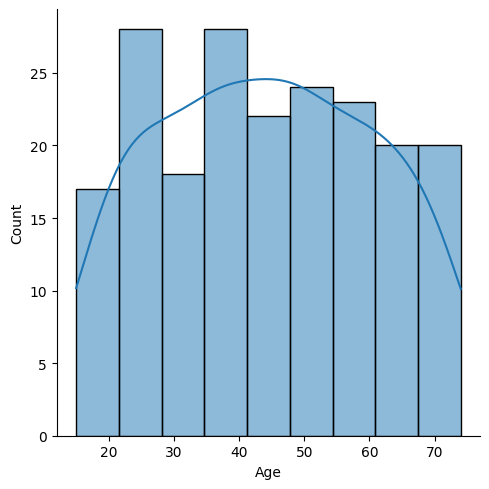

In [6]:
import seaborn as sns
plt.figure(figsize=(9, 5))  # Tamaño de la figura
sns.displot(df.Age, kde=True)  # Histograma con curva KDE


In [7]:
df.Sex.value_counts()

Sex
M    104
F     96
Name: count, dtype: int64

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12056\1383931558.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="BP", palette="Set2")


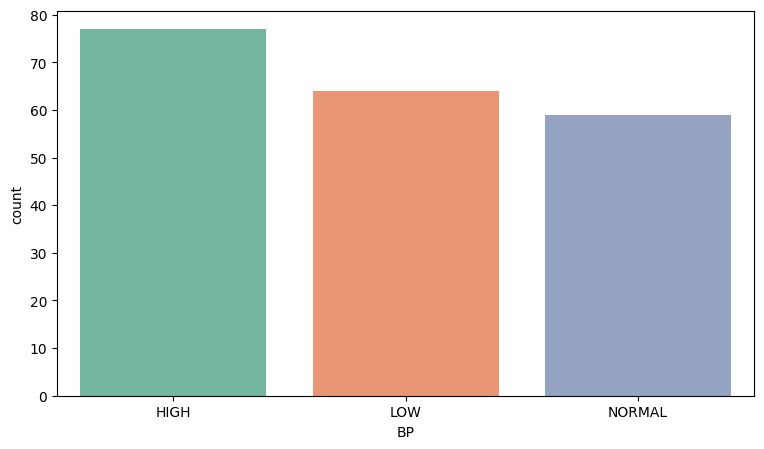

In [8]:
# Crea una gráfica de barras para Presión Sanguinea

plt.figure(figsize=(9, 5))
sns.countplot(data=df, x="BP", palette="Set2")
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12056\1087760992.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Cholesterol", palette="Set2")


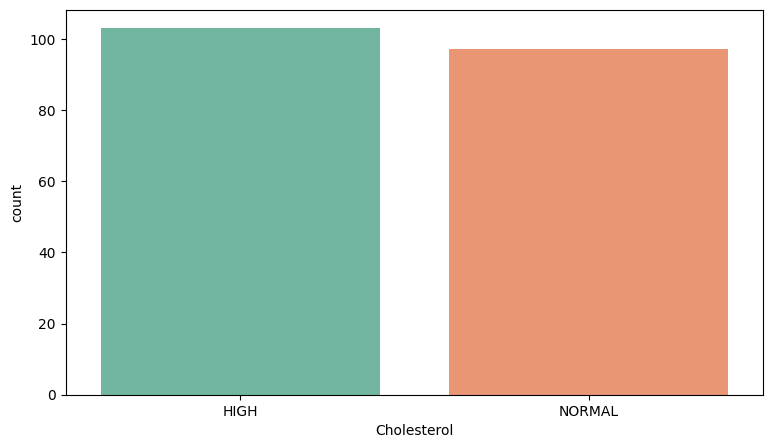

In [9]:
# Crea una gráfica de barras para Colesterol
plt.figure(figsize=(9,5))
sns.countplot(data=df, x="Cholesterol", palette="Set2")
plt.show()

<Figure size 900x500 with 0 Axes>

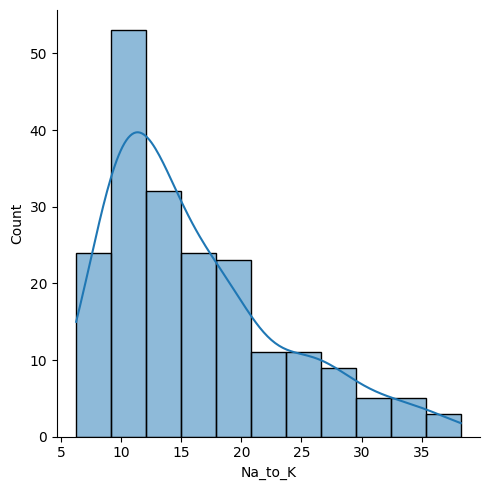

In [10]:
# Crea un displot para Sodio Potasio
plt.figure(figsize = (9,5))

sns.displot(df.Na_to_K,kde=True)


Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

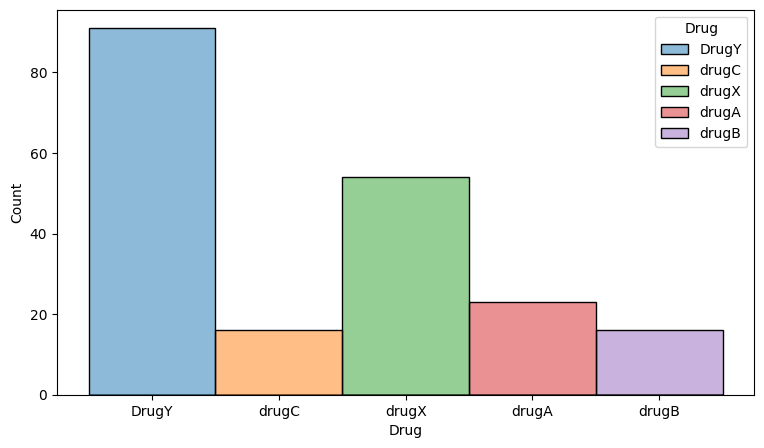

In [11]:
# Crea una gráfica de barras para los Medicamentos (droga) 💊

#Cuenta los medicamentos
plt.figure(figsize = (9,5))

sns.histplot(data=df,x="Drug",hue="Drug")

df.Drug.value_counts()


***

## <span style="color:green">3. Análisis de Relación entre Variables</span>


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12056\2203692238.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Drug")  # para que la leyenda tenga título


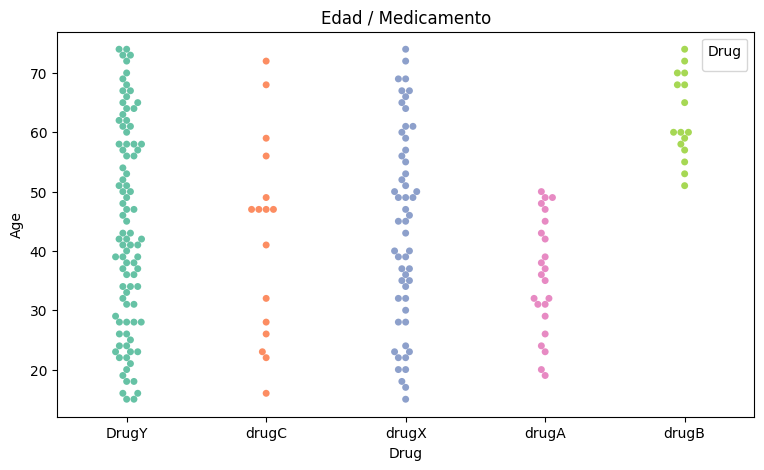

In [12]:
## Grafica (con swarmplot) la relación entre la Edad y los Medicamentos que se les da acorde a 💊
plt.figure(figsize=(9,5))

sns.swarmplot(x="Drug", y="Age", data=df, hue="Drug", palette="Set2")

plt.title("Edad / Medicamento")

plt.legend(title="Drug")  # para que la leyenda tenga título

plt.show()


In [13]:
# Grafica la relación entre el el Género y los Medicamentos 💊 que se les da
#Primero armar una tablita para poder graficarlas
df_Sex_Drug = df.groupby(["Drug","Sex"]).size().reset_index(name = "Count")

df_Sex_Drug


,Drug,Sex,Count
0,DrugY,F,47
1,DrugY,M,44
2,drugA,F,9
3,drugA,M,14
4,drugB,F,6
5,drugB,M,10
6,drugC,F,7
7,drugC,M,9
8,drugX,F,27
9,drugX,M,27


Text(0.5, 1.0, 'Género/Medicamento')

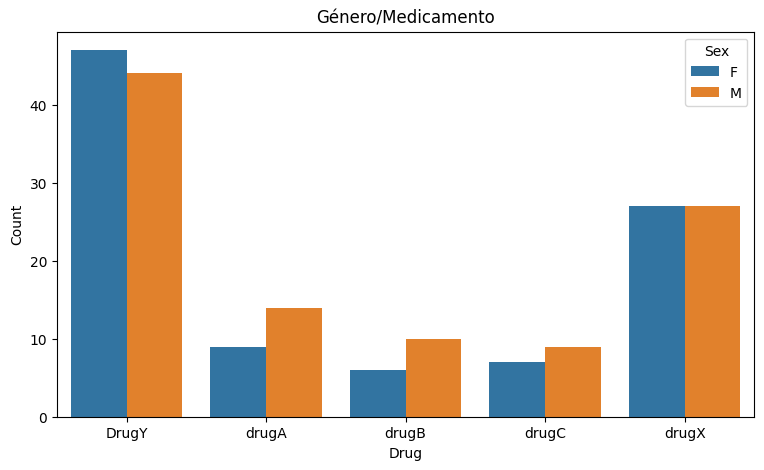

In [14]:
#Grafica la tablita anterior con una gráfica de barras
plt.figure(figsize = (9,5))

sns.barplot(x = "Drug",y="Count", hue = "Sex",data = df_Sex_Drug)

plt.title("Género/Medicamento")

In [15]:
# Grafica la relación entre la Presión Sanguínea y los Medicamentos 💊
df_BP_Drug = df.groupby(["Drug","BP"]).size().reset_index(name = "Count") #TABLITAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
df_BP_Drug

,Drug,BP,Count
0,DrugY,HIGH,38
1,DrugY,LOW,30
2,DrugY,NORMAL,23
3,drugA,HIGH,23
4,drugB,HIGH,16
5,drugC,LOW,16
6,drugX,LOW,18
7,drugX,NORMAL,36


Text(0.5, 1.0, 'Presión Sanguinea/Medicamentos')

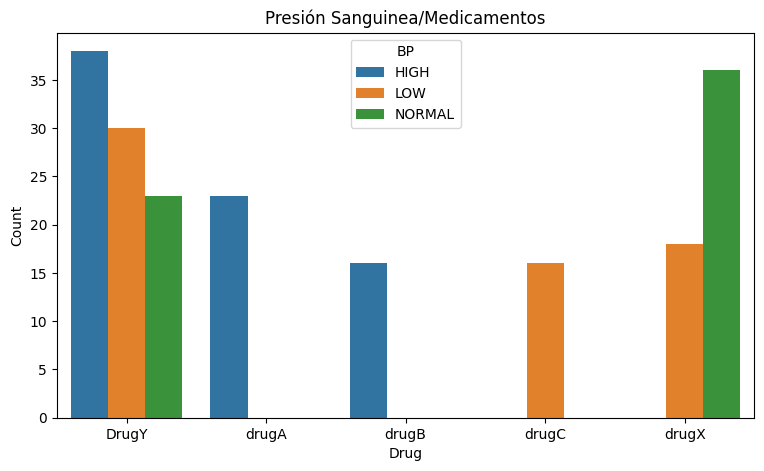

In [16]:
plt.figure(figsize = (9,5))

sns.barplot(x = "Drug",y="Count", hue = "BP",data = df_BP_Drug)

plt.title("Presión Sanguinea/Medicamentos")

In [17]:
# Grafica (con una gráfica de barras)nla relación entre el nivel de colesterol y los medicamentos 💊
df_CH_Drug = df.groupby(["Drug","Cholesterol"]).size().reset_index(name = "Count") #tablaaaaaaaaa

df_CH_Drug

,Drug,Cholesterol,Count
0,DrugY,HIGH,47
1,DrugY,NORMAL,44
2,drugA,HIGH,12
3,drugA,NORMAL,11
4,drugB,HIGH,8
5,drugB,NORMAL,8
6,drugC,HIGH,16
7,drugX,HIGH,20
8,drugX,NORMAL,34


Text(0.5, 1.0, 'Cholesterol -- Drug')

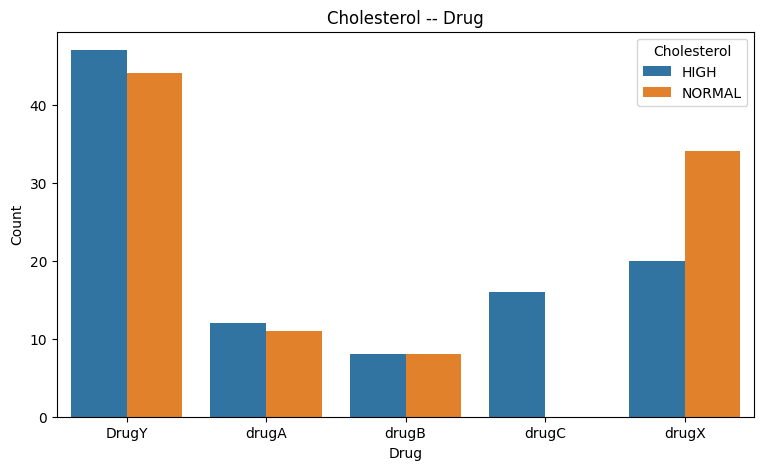

In [18]:
plt.figure(figsize = (9,5))

sns.barplot(x = "Drug",y="Count", hue = "Cholesterol",data = df_CH_Drug)

plt.title("Cholesterol -- Drug")

Text(0.5, 1.0, 'Sodio-Potasio/Medicamentos')

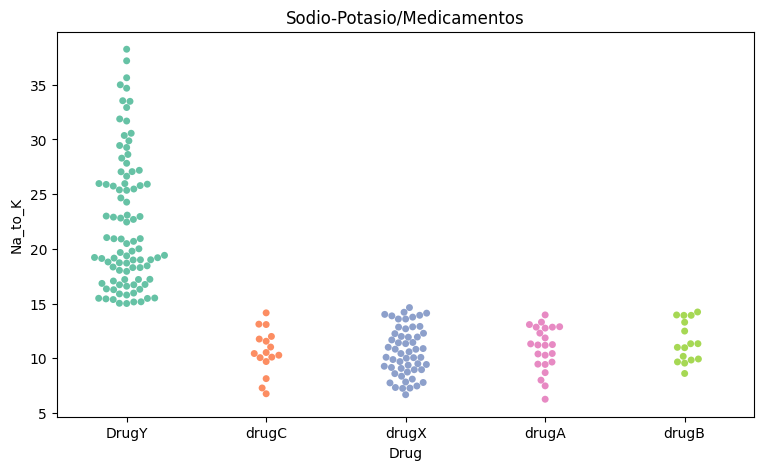

In [19]:
#Grafica (con un swarmplot) la relación entre el nivel de Sodio-Potasio y los medicamentos 💊 que se les da
plt.figure(figsize = (9,5))

sns.swarmplot(x = "Drug", y = "Na_to_K",data = df , hue = "Drug", palette = "Set2")

plt.title("Sodio-Potasio/Medicamentos")

***

## <span style="color:green">4. Limpieza y Separación de Datos</span>


In [20]:
# Utilizar LabelEncoder para procesar variables alfanuméricas como el sexo, BP, Colesterol, etc.
from sklearn.preprocessing import LabelEncoder

def label_encoder(datos_categoria):
    le = LabelEncoder()
    le.fit(df['Drug'])
    print(list(le.classes_))
    df[datos_categoria] = le.fit_transform(df[datos_categoria])

In [21]:
variables = ["Sex","BP","Cholesterol","Na_to_K","Drug"]

for l in variables:

    label_encoder(l)

df.head()

['DrugY', 'drugA', 'drugB', 'drugC', 'drugX']
['DrugY', 'drugA', 'drugB', 'drugC', 'drugX']
['DrugY', 'drugA', 'drugB', 'drugC', 'drugX']
['DrugY', 'drugA', 'drugB', 'drugC', 'drugX']
['DrugY', 'drugA', 'drugB', 'drugC', 'drugX']


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,167,0
1,47,1,1,0,89,3
2,47,1,1,0,43,3
3,28,0,2,0,10,4
4,61,0,1,0,133,0


In [22]:
x = df.drop(["Drug"], axis=1)
y = df.Drug

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, shuffle=True
)

El 20% de los datos, serán de prueba. Shuffle será true. Semilla de Aleatoriedad=42

***

## <span style="color:green">5. Modelo de Clasificación Binario</span>


In [24]:
# Crear modelo para medicamento
y_train_c = (y_train == 3)
y_test_c = (y_test == 3)
y_train_c
y_test_c


95     False
15     False
30     False
158     True
128    False
115    False
69     False
170    False
174    False
45     False
66     False
182    False
165    False
78     False
186    False
177    False
56     False
152    False
82      True
68     False
124    False
16     False
148    False
93     False
65     False
60     False
84      True
67     False
125    False
132    False
9      False
18      True
55      True
75     False
150    False
104    False
135    False
137    False
164    False
76     False
Name: Drug, dtype: bool

Empezaremos con la medicina Y porque es la más popular y, por ende la más fácil de predecir

In [25]:
from sklearn.linear_model import SGDClassifier

# Creamos el modelo con semilla para resultados consistentes
sgd = SGDClassifier(random_state=42)

# Entrenamos con los datos y etiquetas binarizadas para medicamento Y
sgd.fit(x_train, y_train_c)


SGDClassifier(random_state=42)

In [26]:
# Predicción con ejemplo ficticio
# [Edad, Género, Presión, Colesterol, Na_to_K]
print(sgd.predict([[47, 1, 1, 0, 8]]))

[ True]


C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


👀: para saber que le esta yendo bien al modelo tienen que coincidir los resultados

***

## <span style="color:green">6. Medidas de desempeño</span>


### <span style="color:blue">6.1 Exactitud</span>

In [27]:
# Realiza una Cross validation/K-Folds
from sklearn.model_selection import cross_val_score

# Realiza una validación cruzada (K-Folds) con 3 folds y accuracy como métrica
scores = cross_val_score(sgd, x_train, y_train_c, cv=3, scoring="accuracy")
print("Accuracy en los folds:", scores)
print("Accuracy promedio:", scores.mean())

Accuracy en los folds: [0.85185185 0.88679245 0.9245283 ]
Accuracy promedio: 0.8877242021896109


 
**cv:** número de dobleses 

**scoring:** accuracy (será nuestra medida de desempeño)  

***

### <span style="color:blue">6.2 Matriz de Confusión</span>

In [28]:
from sklearn.model_selection import cross_val_predict

# Generar predicciones en validación cruzada
sgd.fit(x_train, y_train_c)
y_train_pred = cross_val_predict(sgd, x_train, y_train_c, cv=3)


In [29]:
from sklearn.metrics import confusion_matrix

# Crear matriz de confusión: compara las etiquetas reales vs las predichas
conf_matrix = confusion_matrix(y_train_c, y_train_pred)
print("Matriz de Confusión:")
print(conf_matrix)

Matriz de Confusión:
[[142   7]
 [ 11   0]]


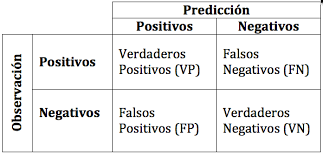

**Verdaderos Negativos**: esquina superior izquierda 

**Falsos positivos**: esquina superior derecha

**Falsos Negativos**: esquina inferior izquierda

**Verdaderos Positivos**: esquina inferior derecha 

***

### <span style="color:blue">6.3 Precision y Recall</span>

In [30]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_train_c, y_train_pred)
recall = recall_score(y_train_c, y_train_pred)

print("Precisión:", precision)
print("Recall:", recall)

Precisión: 0.0
Recall: 0.0


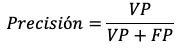

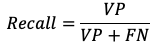

In [31]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 42)

rfc.fit(x_train,y_train_c)

y_train_pred = cross_val_predict(rfc,x_train,y_train_c,cv=3)

In [32]:
from sklearn.metrics import f1_score

# Calcular precisión, recall y F1
precision_rf = precision_score(y_train_c, y_train_pred_rf)
recall_rf = recall_score(y_train_y, y_train_pred_rf)
f1_rf = f1_score(y_train_y, y_train_pred_rf)

print("Precisión:", precision_rf)
print("Recall:", recall_rf)
print("F1:", f1_rf)

NameError: name 'y_train_pred_rf' is not defined

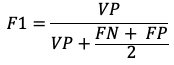

***

### <span style="color:blue">6.4 Umbral Precision y Recall</span>

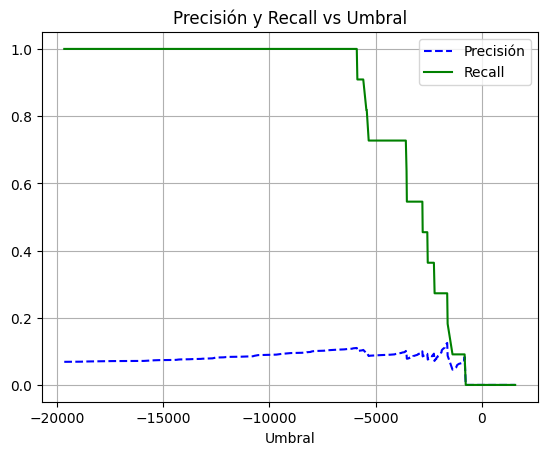

In [33]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

# Obtener los puntajes de decisión para cada instancia
y_scores = cross_val_predict(sgd, x_train, y_train_c, cv=3, method="decision_function")

# Calcular precisión, recall y umbrales
precisions, recalls, umbrales = precision_recall_curve(y_train_c, y_scores)

# Graficar precisión y recall contra los umbrales
plt.plot(umbrales, precisions[:-1], "b--", label="Precisión")
plt.plot(umbrales, recalls[:-1], "g-", label="Recall")
plt.xlabel("Umbral")
plt.legend(loc="best")
plt.title("Precisión y Recall vs Umbral")
plt.grid()
plt.show()

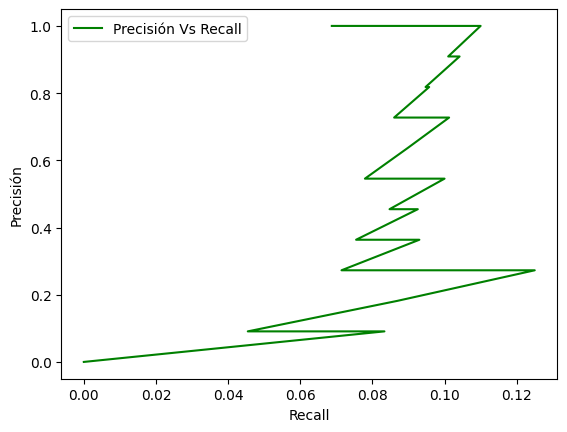

In [34]:
plt.plot(precisions[:-1], recalls[:-1],"g-",label="Precisión Vs Recall")

plt.xlabel("Recall")

plt.ylabel("Precisión")

plt.legend()

plt.show()

El umbral te permite conocer qué medida priorizar acorde a tus objetivos. Ya sea que estemos hablando de videos de youtube para niños 🍭 o un sistema de seguridad 🔒.

In [35]:
# Encontrar el primer índice donde la precisión es mayor o igual a 0.90
idx_90 = np.argmax(precisions >= 0.90)

# Si el índice es mayor o igual al tamaño de umbrales, usa el último umbral disponible
if idx_90 >= len(umbrales):
    idx_90 = len(umbrales) - 1

umbral_90 = umbrales[idx_90]
print("Umbral para 90% de precisión:", umbral_90)

# Definir las predicciones usando el umbral de 90% de precisión
y_train_90 = (y_scores >= umbral_90)

# Calcular precisión y recall con el nuevo umbral
precision_90 = precision_score(y_train_c, y_train_90)
recall_90 = recall_score(y_train_c, y_train_90)

print("Precisión con umbral 90%:", precision_90)
print("Recall con umbral 90%:", recall_90)

Umbral para 90% de precisión: 1564.500163200087
Precisión con umbral 90%: 0.0
Recall con umbral 90%: 0.0


***

### <span style="color:blue">6.5 Curva ROC</span>


Grafica Recall contra el porcentaje de Falsos Positivos

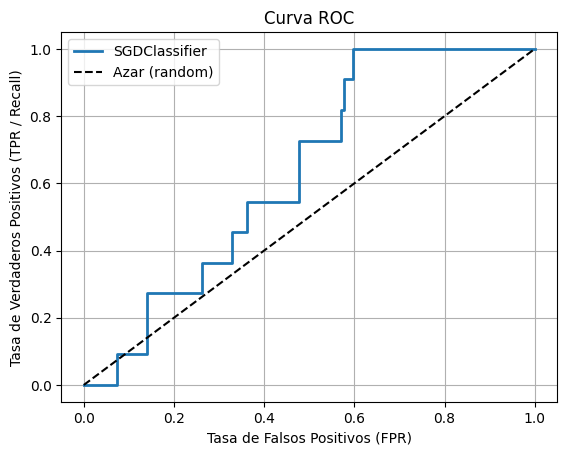

Área bajo la curva ROC (AUC): 0.6357535082367297


In [36]:
#Importar roc_curve
from sklearn.metrics import roc_curve, roc_auc_score

# Obtener los puntajes de decisión para cada instancia
y_scores = cross_val_predict(sgd, x_train, y_train_c, cv=3, method="decision_function")

# Calcular los valores para la curva ROC
fpr, tpr, umbrales_roc = roc_curve(y_train_c, y_scores)

# Graficar la curva ROC
plt.plot(fpr, tpr, linewidth=2, label="SGDClassifier")
plt.plot([0, 1], [0, 1], 'k--', label="Azar (random)")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR / Recall)")
plt.title("Curva ROC")
plt.legend(loc="best")
plt.grid()
plt.show()

# Calcular el área bajo la curva (AUC)
roc_auc = roc_auc_score(y_train_c, y_scores)
print("Área bajo la curva ROC (AUC):", roc_auc)


Un modelo perfecto se asimila a una escuadra entre la curva ROC y la línea punteada porque existe una mayor área bajo la curva

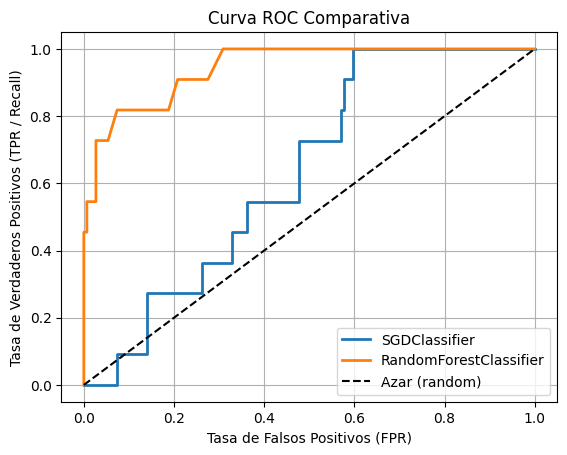

Área bajo la curva ROC (AUC) Random Forest: 0.9441732763880415


In [37]:
#Compararlo con el modelo de random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

# Entrenar el modelo Random Forest
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train, y_train_c)

# Obtener los puntajes de predicción (probabilidades)
y_probas_rf = cross_val_predict(rfc, x_train, y_train_c, cv=3, method="predict_proba")
y_scores_rf = y_probas_rf[:, 1]  # Probabilidad de clase positiva

# Calcular los valores para la curva ROC
fpr_rf, tpr_rf, umbrales_rf = roc_curve(y_train_c, y_scores_rf)

# Graficar ambas curvas ROC
plt.plot(fpr, tpr, linewidth=2, label="SGDClassifier")
plt.plot(fpr_rf, tpr_rf, linewidth=2, label="RandomForestClassifier")
plt.plot([0, 1], [0, 1], 'k--', label="Azar (random)")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR / Recall)")
plt.title("Curva ROC Comparativa")
plt.legend(loc="best")
plt.grid()
plt.show()

# Calcular el área bajo la curva (AUC) para Random Forest
roc_auc_rf = roc_auc_score(y_train_c, y_scores_rf)
print("Área bajo la curva ROC (AUC) Random Forest:", roc_auc_rf)

***

## <span style="color:green">7. Clasificadores Multiclase</span>


In [38]:
# Importar SVC=Support Vector Classifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
import numpy as np
# Entrenar SGDClassifier multiclase (One-vs-All por defecto)
sgd_multi = SGDClassifier(random_state=42)
sgd_multi.fit(x_train, y_train)
#Predecir a un humano aleatorio para ver que todo este funcionando bien 
# Entrenar SVC multiclase
svc = SVC(decision_function_shape='ovr', probability=True, random_state=42)
svc.fit(x_train, y_train)

SVC(probability=True, random_state=42)

In [39]:
# Predecir a un humano aleatorio para ver que todo este funcionando bien 
ejemplo = [[25, 0, 1, 0, 15]]  # [Edad, Sexo, BP, Cholesterol, Na_to_K]
pred_sgd = sgd_multi.predict(ejemplo)
pred_svc = svc.predict(ejemplo)
print("Predicción SGDClassifier:", pred_sgd)
print("Predicción SVC:", pred_svc)

Predicción SGDClassifier: [4]
Predicción SVC: [4]


C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [40]:
# Utilizar decision_function para observar los puntajes de cada medicina 
scores_sgd = sgd_multi.decision_function(ejemplo)
scores_svc = svc.decision_function(ejemplo)
print("Puntajes de decisión SGDClassifier:", scores_sgd)
print("Puntajes de decisión SVC:", scores_svc)

Puntajes de decisión SGDClassifier: [[-19100.74711761  -1060.45139293    840.11929225  -1804.49517942
    1634.87558863]]
Puntajes de decisión SVC: [[-0.28721252  3.24926479  0.80636121  1.91982964  4.27745377]]


C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [41]:
#campararlo con los datos obtenidos de sgd.fit 
# Campararlo con los datos obtenidos de sgd.fit 
print("Clase predicha por SGDClassifier:", np.argmax(scores_sgd))
print("Clase predicha por SVC:", np.argmax(scores_svc))

Clase predicha por SGDClassifier: 4
Clase predicha por SVC: 4


***

## <span style="color:green">8. Analizar Errores</span>

In [42]:
#Hacer un clasificador de random forest
#Hacer un clasificador de random forest
from sklearn.ensemble import RandomForestClassifier

rfc_multi = RandomForestClassifier(random_state=42)
rfc_multi.fit(x_train, y_train)
y_pred_rf = rfc_multi.predict(x_test


_IncompleteInputError: incomplete input (3398513474.py, line 7)

In [43]:
#Utilizar la matriz de confusión 
#Utilizar la matriz de confusión 
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de confusión Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


NameError: name 'y_pred_rf' is not defined

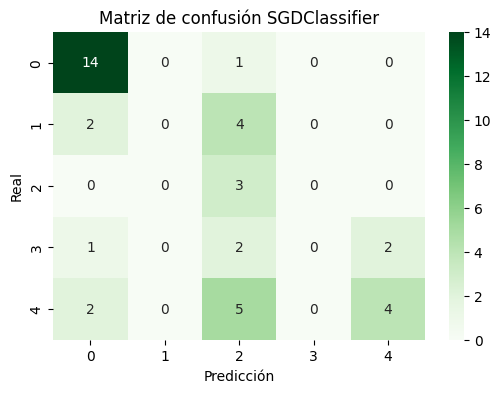

In [ ]:
#utilizar ahora SGD
#utilizar ahora SGD
sgd_multi = SGDClassifier(random_state=42)
sgd_multi.fit(x_train, y_train)
y_pred_sgd = sgd_multi.predict(x_test)

conf_matrix_sgd = confusion_matrix(y_test, y_pred_sgd)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_sgd, annot=True, fmt="d", cmap="Greens")
plt.title("Matriz de confusión SGDClassifier")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()
